In [125]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from PyAstronomy import pyasl
%matplotlib inline

In [126]:
# #sine
# f=0.3
# omega=f*2*math.pi
# T=np.linspace(0,100,10000)
# dt=T[1]-T[0]
# x=np.zeros(len(T))
# for i in range(len(T)):
#     x[i]=math.sin(omega*T[i])
# plt.plot(T,x)
# print(dt)

In [127]:
# # gaussian pulse
# T=np.linspace(-10,10,10000)
# x=np.zeros(len(T))
# for i in range(len(T)):
#     x[i]=math.exp(-(T[i]/1)**2)
# plt.plot(T,x)

(0.0, 100.0)

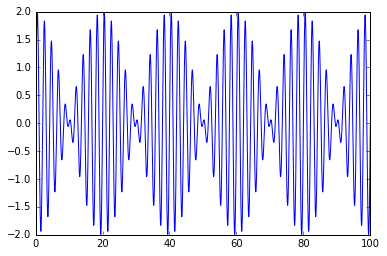

In [128]:
# wave packet
omega1=0.45*2*math.pi
omega2=0.5*2*math.pi
T=np.linspace(0,100,10000)
dt=T[1]-T[0]
xa=np.zeros(len(T))
xb=np.zeros(len(T))
x=np.zeros(len(T))
for i in range(len(T)):
    xa[i]=math.sin(omega1*T[i])
    xb[i]=math.sin(omega2*T[i])
    x[i]=xa[i]+xb[i]
plt.plot(T,x)
plt.xlim()

(40, 80)

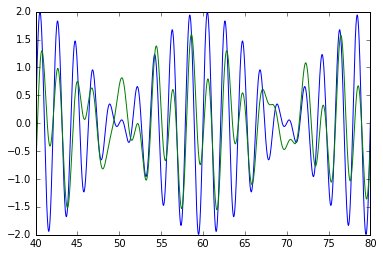

In [129]:
# UNGD output
tau=2
alpha=5.3
K=5.4
y=np.zeros(len(T))
for i in range(len(T)-1):
    delayi=int(i-tau/dt)
    if delayi>=0:
        dy=dt*(-alpha*y[i]+K*(x[i]-y[int(delayi)]))
    else:
        dy=0
    y[i+1]=y[i]+dy
plt.plot(T,x)
plt.plot(T,y/max(y)*max(x))
plt.xlim(40,80)

[       -inf -1.28000421 -0.70761996 -0.29339379  0.          0.29382228
  0.70796341  1.28045947         inf]
[       -inf -0.73443902 -0.40771169 -0.19682411  0.          0.23171491
  0.44149837  0.72978933         inf]


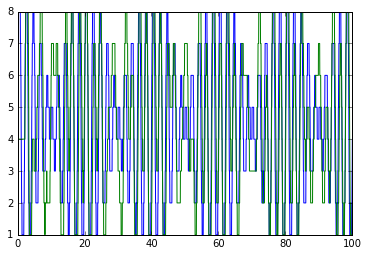

10000 10000 10000


In [130]:
# assign data to different state
# state number should be even
nx=8
ny=8

# states of input
xs=x
xs=np.sort(x)
xstatestep=len(xs)/nx
xinterval=[0]
for i in range(int(nx/2-1)):
    xinterval=np.append(xinterval,xs[round(len(xs)/2)+(i+1)*round(xstatestep)])
xinterval=np.append(xinterval,float('inf'))
for j in range(int(nx/2-1)):
    xinterval=np.append(xs[round(len(xs)/2)-(j+1)*round(xstatestep)],xinterval)
xinterval=np.append(float('-inf'),xinterval)
print(xinterval)
xstate=np.zeros(len(x))
for i in range(len(x)):
    tempinterval=[]
    state=[]
    tempinterval=np.array(xinterval)
    tempinterval=np.append(tempinterval,x[i])
    tempinterval=np.sort(tempinterval)
    state=np.where(tempinterval==x[i])
    xstate[i]=state[0][0]

# states of output
ys=y
ys=np.sort(y)
ystatestep=len(ys)/ny
yinterval=[0]
for i in range(int(ny/2-1)):
    yinterval=np.append(yinterval,ys[round(len(ys)/2)+(i+1)*round(ystatestep)])
yinterval=np.append(yinterval,float('inf'))
for j in range(int(ny/2-1)):
    yinterval=np.append(ys[round(len(ys)/2)-(j+1)*round(ystatestep)],yinterval)
yinterval=np.append(float('-inf'),yinterval)
print(yinterval)
ystate=np.zeros(len(y))
for i in range(len(y)):
    tempinterval=[]
    state=[]
    tempinterval=np.array(yinterval)
    tempinterval=np.append(tempinterval,y[i])
    tempinterval=np.sort(tempinterval)
    state=np.where(tempinterval==y[i])
    ystate[i]=state[0][0]
    
plt.plot(T,xstate)
plt.plot(T,ystate)
plt.xlim()
plt.show()
print(len(xstate),len(ystate),len(y))


In [131]:
# calculating mutual information
negshift=-3 # second
posshift=3 # second
shiftdu=dt # second
shiftlen=(posshift-negshift)/dt+1
timeshift=np.linspace(negshift,posshift,shiftlen)
bitshift=np.linspace(negshift/dt,posshift/dt,shiftlen)
xedges=np.linspace(1,nx+1,nx+1) # states of x
yedges=np.linspace(1,ny+1,ny+1) # states of y

# shifted data
# shift>0 => y shifted to positive side
MI=np.zeros(len(bitshift))
for i in range(len(bitshift)):
    xx=[]
    yy=[]
    shift=int(bitshift[i])
    if shift>0:
        xx=xstate[shift:]
        yy=ystate[:-shift]
    elif shift==0:
        xx=xstate
        yy=ystate
    elif shift<0:
        xx=xstate[:shift]
        yy=ystate[-shift:]

    H, xedges, yedges = np.histogram2d(xx, yy, bins=(xedges, yedges))
    statesum=np.sum(H)
    px_list=np.sum(H,axis=1)/statesum
    py_list=np.sum(H,axis=0)/statesum
    pxy_list=H/statesum
    
    MIsingle=np.zeros(len(xx))
    for j in range(len(xx)):
        px=px_list[int(xx[j]-1)]
        py=py_list[int(yy[j]-1)]
        pxy=pxy_list[int(xx[j]-1)][int(yy[j]-1)]
        MIsingle[j]=pxy*math.log2(pxy/px/py)
    MI[i]=np.sum(MIsingle)
    


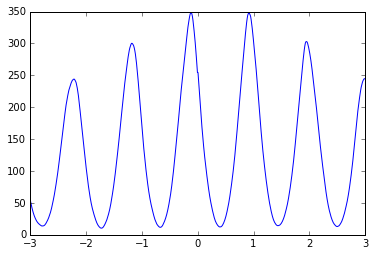

In [132]:

plt.plot(timeshift,MI)

In [133]:
print(len(xstate))

10000
